<a href="https://colab.research.google.com/github/hoky1227/Parkinsons-Disease/blob/main/PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

[https://archive.ics.uci.edu/ml/datasets/Daphnet+Freezing+of+Gait](https://archive.ics.uci.edu/ml/datasets/Daphnet+Freezing+of+Gait) - Daphnet Gait (DG) — FoG labeld

[https://physionet.org/content/gaitpdb/1.0.0/](https://physionet.org/content/gaitpdb/1.0.0/) - Gait in Parkinson's Disease (GPD) — Control subject & PD patient


# Papers (Datasets)

HuGaDB: Human Gait Database for Activity Recognition from Wearable Inertial Sensor Networks (DG) - [https://arxiv.org/pdf/1705.08506v2.pdf](https://arxiv.org/pdf/1705.08506v2.pdf) -- HuGaDB https://github.com/romanchereshnev/HuGaDB

Deep 1D-Convnet for accurate Parkinson disease
detection and severity prediction from gait (GPD) - [https://arxiv.org/pdf/1910.11509v4.pdf](https://arxiv.org/pdf/1910.11509v4.pdf)

Linear Prediction Residual for Efficient
Diagnosis of Parkinson’s Disease from Gait (GPD) - [https://arxiv.org/pdf/2107.12878v1.pdf](https://arxiv.org/pdf/2107.12878v1.pdf)

Parkinson's Disease Assessment from a Wrist-Worn Wearable Sensor in Free-Living Conditions: Deep Ensemble Learning and Visualization (Private) - [https://arxiv.org/pdf/1808.02870v1.pdf](https://arxiv.org/pdf/1808.02870v1.pdf)

Multimodal Gait Recognition for Neurodegenerative
Diseases (manymany) - [https://arxiv.org/pdf/2101.02469v1.pdf](https://arxiv.org/pdf/2101.02469v1.pdf)

MGait: Model-Based Gait Analysis Using Wearable Bend and
Inertial Sensors (Private, will be release) - [https://arxiv.org/pdf/2102.11895v2.pdf](https://arxiv.org/pdf/2102.11895v2.pdf)

High Frequency Remote Monitoring of Parkinson’s
Disease via Smartphone: Platform Overview and
Medication Response Detection (???) - [https://arxiv.org/pdf/1601.00960v1.pdf](https://arxiv.org/pdf/1601.00960v1.pdf)

# Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/medical'
DG_path = path + '/datasets/dataset_fog_release/dataset/'
GPD_path = path + '/datasets/gait-in-parkinsons-disease-1.0.0/'

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import easydict
from glob import glob

# DG

In [ ]:
DG_fl = sorted(glob(DG_path + '*'))
DG_fl

['/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S01R01.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S01R02.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S02R01.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S02R02.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S03R01.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S03R02.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S03R03.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S04R01.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S05R01.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S05R02.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S06R01.txt',
 '/content/drive/MyDrive/medical/datasets/dataset_fog_release/dataset/S06R02.txt',
 '/c

hf : horizontal forward

v : vertical

hl : horizontal lateral

---

Annotations :

0: not part of the experiment. For instance the sensors are installed on the user or the user is performing activities unrelated to the experimental protocol, such as debriefing

1: experiment, no freeze (can be any of stand, walk, turn)

2: freeze

In [ ]:
col = ['Time', 'Ankle_hf', 'Ankle_v', 'Ankle_hl', 'Thigh_hf', 'Thigh_v', 'Thigh_hl',
       'Trunk_hf', 'Trunk_v', 'Trunk_hl', 'Annotations']

df = pd.read_csv(DG_fl[0], sep=' ', names=col)
df

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
0,15,70,39,-970,0,0,0,0,0,0,0
1,31,70,39,-970,0,0,0,0,0,0,0
2,46,60,49,-960,0,0,0,0,0,0,0
3,62,60,49,-960,0,0,0,0,0,0,0
4,78,50,39,-960,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
151982,2374734,80,39,-960,9,-46,-1000,514,-390,-747,0
151983,2374750,60,39,-950,-9,-27,-979,514,-390,-718,0
151984,2374765,60,39,-950,-18,-37,-979,524,-390,-747,0
151985,2374781,60,29,-950,9,-46,-969,524,-390,-728,0


In [ ]:
df2 = df.drop(df[df['Annotations']==0].index).reset_index(drop=True)
df2

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
0,750000,-30,990,326,-45,972,181,-38,1000,29,1
1,750015,-30,1000,356,-18,981,212,-48,1028,29,1
2,750031,-20,990,336,18,981,222,-38,1038,9,1
3,750046,-20,1000,316,36,990,222,-19,1038,9,1
4,750062,0,990,316,36,990,212,-29,1038,29,1
...,...,...,...,...,...,...,...,...,...,...,...
92797,2249937,-212,921,425,800,370,212,126,923,417,1
92798,2249953,-202,911,405,809,379,202,135,923,436,1
92799,2249968,-222,921,405,809,379,202,135,904,436,1
92800,2249984,-222,921,405,818,388,232,106,923,446,1


In [ ]:
ann_2 = df2[df2['Annotations']==2]
ann_2

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
21746,1139765,-202,960,425,445,888,464,-203,885,252,2
21747,1139781,-20,1127,386,536,907,333,-300,923,252,2
21748,1139796,-80,1058,475,672,981,232,-359,990,135,2
21749,1139812,-90,1156,534,836,888,151,-359,990,-19,2
21750,1139828,-50,1343,485,1081,888,181,-436,933,-58,2
...,...,...,...,...,...,...,...,...,...,...,...
87853,2172687,1969,39,-1158,-2736,703,656,-19,961,592,2
87854,2172703,-121,313,1257,-2063,1620,444,0,1257,271,2
87855,2172718,313,2764,306,1354,1657,-666,58,1771,-300,2
87856,2172734,-424,2049,-277,2700,1203,-191,-135,1847,-310,2


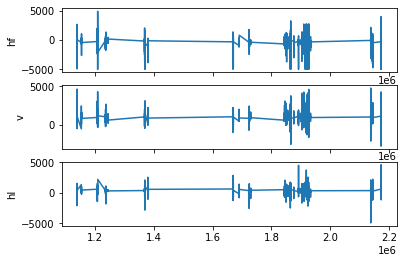

In [ ]:
ax1 = plt.subplot(311)
plt.plot(ann_2['Time'], ann_2['Ankle_hf'])
plt.ylabel('hf')
plt.xticks(visible=False)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(ann_2['Time'], ann_2['Ankle_v'])
plt.xticks(visible=False)
plt.ylabel('v')

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(ann_2['Time'], ann_2['Ankle_hl'])
plt.ylabel('hl')

plt.show()

In [ ]:
ann_1 = df2[df2['Annotations']==1]
ann_1

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
0,750000,-30,990,326,-45,972,181,-38,1000,29,1
1,750015,-30,1000,356,-18,981,212,-48,1028,29,1
2,750031,-20,990,336,18,981,222,-38,1038,9,1
3,750046,-20,1000,316,36,990,222,-19,1038,9,1
4,750062,0,990,316,36,990,212,-29,1038,29,1
...,...,...,...,...,...,...,...,...,...,...,...
92797,2249937,-212,921,425,800,370,212,126,923,417,1
92798,2249953,-202,911,405,809,379,202,135,923,436,1
92799,2249968,-222,921,405,809,379,202,135,904,436,1
92800,2249984,-222,921,405,818,388,232,106,923,446,1


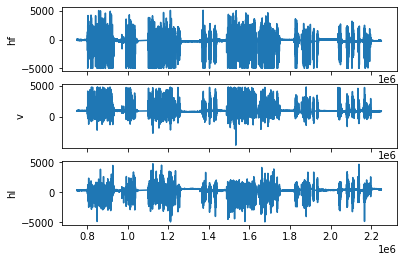

In [ ]:
ax1 = plt.subplot(311)
plt.plot(ann_1['Time'], ann_1['Ankle_hf'])
plt.ylabel('hf')
plt.xticks(visible=False)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(ann_1['Time'], ann_1['Ankle_v'])
plt.xticks(visible=False)
plt.ylabel('v')

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(ann_1['Time'], ann_1['Ankle_hl'])
plt.ylabel('hl')

plt.show()

In [ ]:
test = df2.copy()

test.iloc[ann_1.index] = np.NaN
test

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
92797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


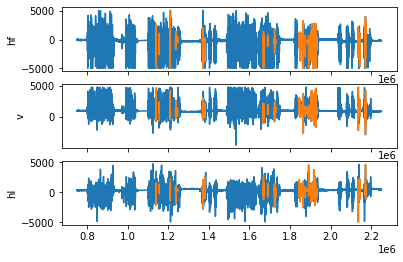

In [ ]:
ax1 = plt.subplot(311)
plt.plot(df2['Time'], df2['Ankle_hf'])
plt.plot(test['Time'], test['Ankle_hf'])
plt.ylabel('hf')
plt.xticks(visible=False)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(df2['Time'], df2['Ankle_v'])
plt.plot(test['Time'], test['Ankle_v'])
plt.xticks(visible=False)
plt.ylabel('v')

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(df2['Time'], df2['Ankle_hl'])
plt.plot(test['Time'], test['Ankle_hl'])
plt.ylabel('hl')

plt.show()

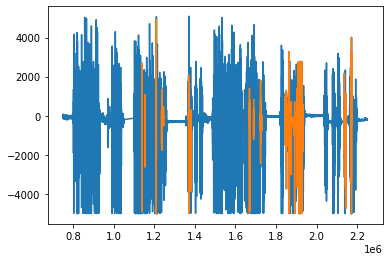

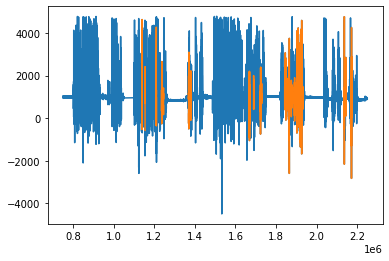

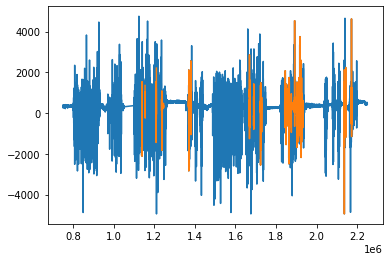

In [ ]:
plt.plot(df2['Time'], df2['Ankle_hf'])
plt.plot(test['Time'], test['Ankle_hf'])
plt.show()

plt.plot(df2['Time'], df2['Ankle_v'])
plt.plot(test['Time'], test['Ankle_v'])
plt.show()

plt.plot(df2['Time'], df2['Ankle_hl'])
plt.plot(test['Time'], test['Ankle_hl'])
plt.show()

In [ ]:
df2.describe()

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
count,9.280200e+04,92802.000000,92802.000000,92802.000000,92802.000000,92802.000000,92802.000000,92802.000000,92802.000000,92802.000000,92802.000000
mean,1.514650e+06,-251.592854,962.059848,359.829433,194.668897,809.908332,248.888343,9.364863,995.735803,127.470733,1.055462
std,4.330372e+05,572.797937,355.215933,290.794891,525.512189,356.628057,187.444701,168.013721,172.485511,184.454327,0.228881
min,7.500000e+05,-5020.000000,-4490.000000,-4950.000000,-3418.000000,-351.000000,-1474.000000,-1834.000000,-38.000000,-1300.000000,1.000000
25%,1.162488e+06,-313.000000,872.000000,277.000000,-154.000000,425.000000,171.000000,-77.000000,914.000000,0.000000,1.000000
50%,1.524992e+06,-191.000000,970.000000,356.000000,90.000000,935.000000,242.000000,9.000000,990.000000,106.000000,1.000000
75%,1.887496e+06,-40.000000,1009.000000,455.000000,763.000000,990.000000,363.000000,135.000000,1038.000000,242.000000,1.000000
max,2.250000e+06,5090.000000,4784.000000,4752.000000,3963.000000,3731.000000,1787.000000,1427.000000,3638.000000,2252.000000,2.000000


In [ ]:
ann_1.describe()

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
count,8.765500e+04,87655.000000,87655.000000,87655.000000,87655.000000,87655.000000,87655.000000,87655.00000,87655.000000,87655.000000,87655.0
mean,1.501343e+06,-249.673801,963.051577,361.107912,204.413359,800.293263,251.025692,14.43483,994.613508,133.544818,1.0
std,4.367199e+05,569.142861,348.742417,287.496320,521.717370,359.891639,184.396990,162.80320,168.297112,183.756945,0.0
min,7.500000e+05,-5010.000000,-4490.000000,-4950.000000,-3154.000000,-268.000000,-1474.000000,-1834.00000,-38.000000,-932.000000,1.0
25%,1.143445e+06,-313.000000,882.000000,287.000000,-154.000000,407.000000,171.000000,-77.00000,914.000000,0.000000,1.0
50%,1.502781e+06,-191.000000,970.000000,366.000000,100.000000,935.000000,242.000000,19.00000,990.000000,116.000000,1.0
75%,1.871367e+06,-40.000000,1009.000000,465.000000,763.000000,990.000000,363.000000,135.00000,1038.000000,252.000000,1.0
max,2.250000e+06,5090.000000,4784.000000,4752.000000,3954.000000,3731.000000,1787.000000,1252.00000,3638.000000,2252.000000,1.0


In [ ]:
ann_2.describe()

,Time,Ankle_hf,Ankle_v,Ankle_hl,Thigh_hf,Thigh_v,Thigh_hl,Trunk_hf,Trunk_v,Trunk_hl,Annotations
count,5.147000e+03,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5147.0
mean,1.741276e+06,-284.274917,945.170391,338.056538,28.717700,973.655916,212.488634,-76.978240,1014.848844,24.027200,2.0
std,2.803802e+05,630.971995,451.135889,341.420497,561.022093,242.865692,230.310088,222.936472,231.695005,164.538243,0.0
min,1.139765e+06,-5020.000000,-2823.000000,-4950.000000,-3418.000000,-351.000000,-1030.000000,-1330.000000,0.000000,-1300.000000,2.0
25%,1.689882e+06,-383.000000,852.000000,267.000000,-200.000000,879.000000,121.000000,-194.000000,895.000000,-48.000000,2.0
50%,1.855171e+06,-252.000000,960.000000,346.000000,45.000000,962.000000,212.000000,-67.000000,1009.000000,38.000000,2.0
75%,1.914304e+06,-131.000000,1058.000000,435.000000,309.000000,1046.000000,323.000000,29.000000,1114.000000,106.000000,2.0
max,2.172750e+06,4929.000000,4764.000000,4623.000000,3963.000000,3120.000000,1292.000000,1427.000000,2323.000000,912.000000,2.0


# GPD

In [ ]:
GPD_co_fl = sorted(glob(GPD_path + '*Co*_*.txt'))
GPD_pt_fl = sorted(glob(GPD_path + '*Pt*_*.txt'))
print(GPD_co_fl[:5])
GPD_pt_fl[:5]

['/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaCo01_01.txt', '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaCo02_01.txt', '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaCo02_02.txt', '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaCo03_01.txt', '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaCo03_02.txt']


['/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaPt03_01.txt',
 '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaPt04_01.txt',
 '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaPt05_01.txt',
 '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaPt06_01.txt',
 '/content/drive/MyDrive/medical/datasets/gait-in-parkinsons-disease-1.0.0/GaPt07_01.txt']

## Format

Each line contains 19 columns:

Column      1:   Time (in seconds)
Columns   2-9:   Vertical ground reaction force (VGRF, in Newton) on each of 8
	  	  sensors located under the left foot
Columns 10-17:   VGRF on each of the 8 sensors located under the right foot
Column     18:   Total force under the left foot
Column     19:   Total force under the right foot.

Sensor       X      Y

L1         -500   -800

L2         -700   -400

L3         -300   -400

L4         -700      0

L5         -300      0

L6         -700    400

L7         -300    400

L8         -500    800



R1          500   -800

R2          700   -400

R3          300   -400

R4          700      0

R5          300      0

R6          700    400

R7          300    400

R8          500    800

The X and Y numbers are in an arbitrary coordinate system reflecting
the relative (arbitrarily scaled) positions of the sensors within each
insole. During walking, the sensors inside each insole remain at the
same relative position, but the two feet are no longer parallel to
each other. Thus, this coordinate system enables a calculation of a
proxy for the location of the center of pressure (COP) under each
foot.

Ga, Ju or Si – indicate the study from which the data originated:
    
    Ga - Galit Yogev et al (dual tasking in PD; Eur J Neuro, 2005)
    
    Ju – Hausdorff et al (RAS in PD; Eur J Neuro, 2007)
    
    Si - Silvi Frenkel-Toledo et al (Treadmill walking in PD; Mov Disorders,
          2005)

Co or Pt: Control subject or a PD Patient

01: Subject number in the group

The sampling rate was 100 Hz.

## Codes

In [ ]:
col = ['Time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6',
       'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'L_tot', 'R_tot']

df_co = pd.read_csv(GPD_co_fl[0], sep='\t', names=col)
df_pt = pd.read_csv(GPD_pt_fl[0], sep='\t', names=col)

In [ ]:
# COM? COP? COF?
L_x = np.array([-500, -700, -300, -700, -300, -700, -300, -500])
L_y = np.array([-800, -400, -400, 0, 0, 400, 400, 800])
R_x = np.array([500, 700, 300, 700, 300, 700, 300, 500])
R_y = np.array([-800, -400, -400, 0, 0, 400, 400, 800])

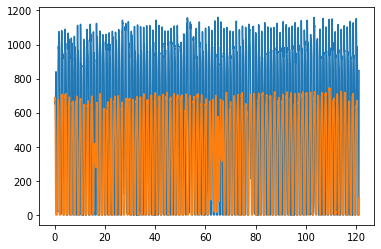

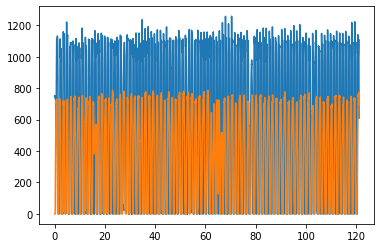

In [ ]:
plt.plot(df_co['Time'], df_co['L_tot'])
plt.plot(df_pt['Time'], df_pt['L_tot'])
plt.show()

plt.plot(df_co['Time'], df_co['R_tot'])
plt.plot(df_pt['Time'], df_pt['R_tot'])
plt.show()

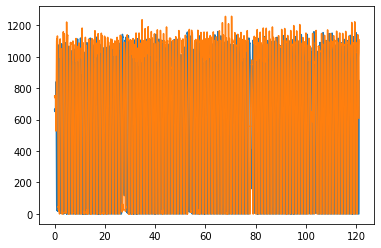

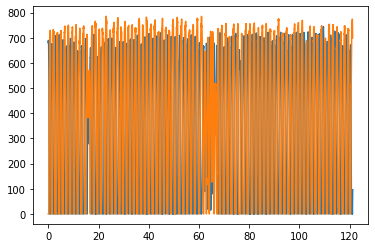

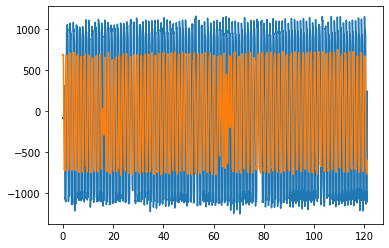

In [ ]:
plt.plot(df_co['Time'], df_co['L_tot'])
plt.plot(df_co['Time'], df_co['R_tot'])
plt.show()

plt.plot(df_pt['Time'], df_pt['L_tot'])
plt.plot(df_pt['Time'], df_pt['R_tot'])
plt.show()

plt.plot(df_co['Time'], df_co['L_tot'] - df_co['R_tot'])
plt.plot(df_pt['Time'], df_pt['L_tot'] - df_pt['R_tot'])
plt.show()

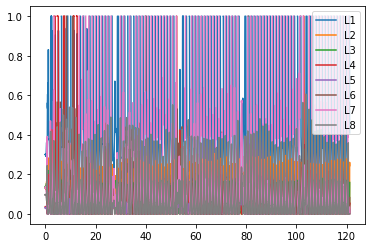

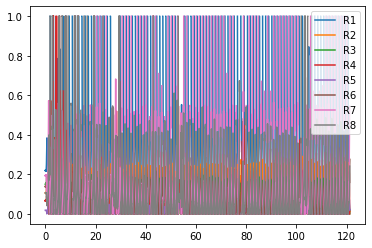

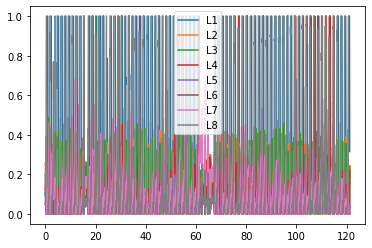

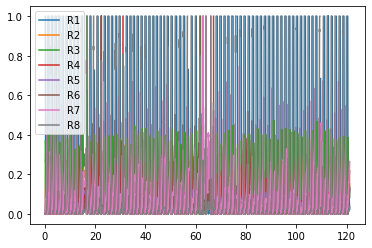

In [ ]:
for i in df_co.columns[1:9]:
    plt.plot(df_co['Time'], df_co[i] / df_co['L_tot'], label=i)
plt.legend()
plt.show()

for i in df_co.columns[9:-2]:
    plt.plot(df_co['Time'], df_co[i] / df_co['R_tot'], label=i)
plt.legend()
plt.show()

for i in df_pt.columns[1:9]:
    plt.plot(df_pt['Time'], df_pt[i] / df_pt['L_tot'], label=i)
plt.legend()
plt.show()

for i in df_pt.columns[9:-2]:
    plt.plot(df_pt['Time'], df_pt[i] / df_pt['R_tot'], label=i)
plt.legend()
plt.show()

In [ ]:
co_L_x = (np.array(df_co.iloc[:, 1:9]) @ L_x.T) / df_co['L_tot']
pt_L_x = (np.array(df_pt.iloc[:, 1:9]) @ L_x.T) / df_pt['L_tot']
co_R_x = (np.array(df_co.iloc[:, 9:-2]) @ R_x.T) / df_co['R_tot']
pt_R_x = (np.array(df_pt.iloc[:, 9:-2]) @ R_x.T) / df_pt['R_tot']

co_L_y = (np.array(df_co.iloc[:, 1:9]) @ L_y.T) / df_co['L_tot']
pt_L_y = (np.array(df_pt.iloc[:, 1:9]) @ L_y.T) / df_pt['L_tot']
co_R_y = (np.array(df_co.iloc[:, 9:-2]) @ R_y.T) / df_co['R_tot']
pt_R_y = (np.array(df_pt.iloc[:, 9:-2]) @ R_y.T) / df_pt['R_tot']

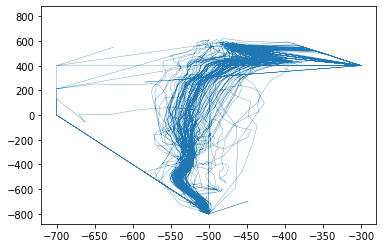

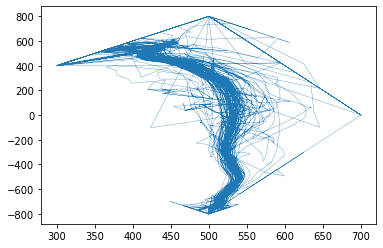

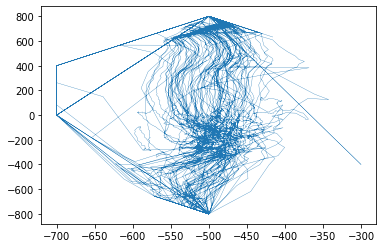

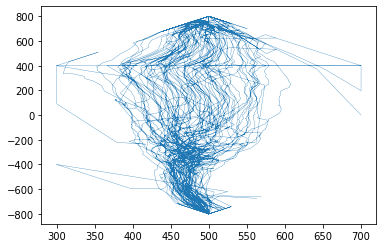

In [ ]:
plt.plot(co_L_x, co_L_y, linewidth=0.3)
plt.show()

plt.plot(co_R_x, co_R_y, linewidth=0.3)
plt.show()

plt.plot(pt_L_x, pt_L_y, linewidth=0.3)
plt.show()

plt.plot(pt_R_x, pt_R_y, linewidth=0.3)
plt.show()

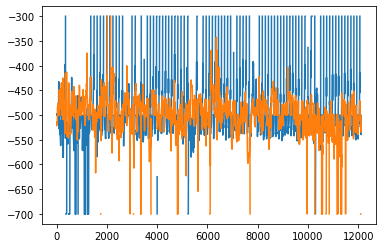

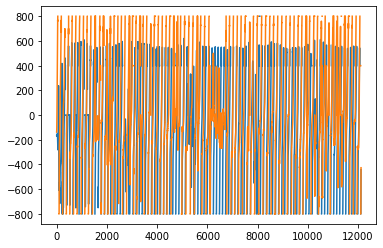

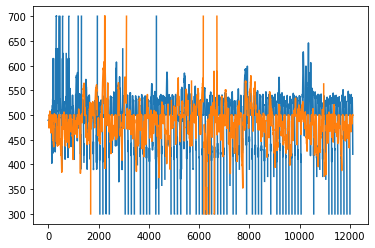

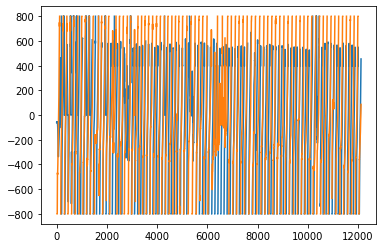

In [ ]:
plt.plot(co_L_x)
plt.plot(pt_L_x)
plt.show()

plt.plot(co_L_y)
plt.plot(pt_L_y)
plt.show()

plt.plot(co_R_x)
plt.plot(pt_R_x)
plt.show()

plt.plot(co_R_y)
plt.plot(pt_R_y)
plt.show()

In [ ]:
col = ['Time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6',
       'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'L_tot', 'R_tot']

df_co = pd.read_csv(GPD_co_fl[3], sep='\t', names=col)
df_pt = pd.read_csv(GPD_pt_fl[3], sep='\t', names=col)

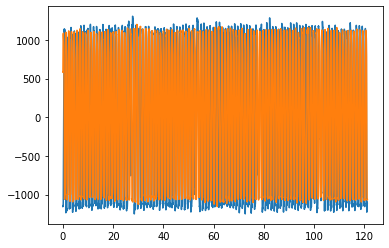

In [ ]:
plt.plot(df_co['Time'], df_co['L_tot'] - df_co['R_tot'])
plt.plot(df_pt['Time'], df_pt['L_tot'] - df_pt['R_tot'])
plt.show()

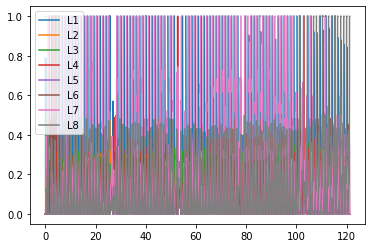

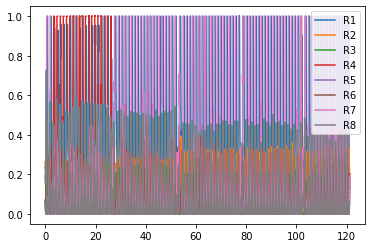

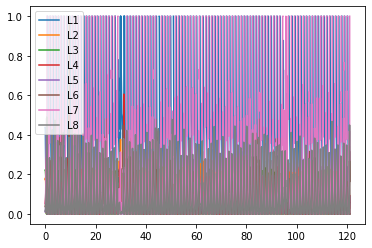

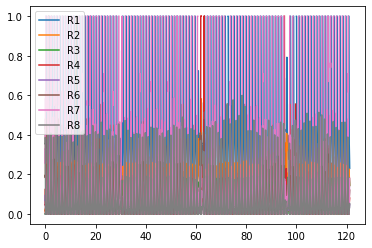

In [ ]:
for i in df_co.columns[1:9]:
    plt.plot(df_co['Time'], df_co[i] / df_co['L_tot'], label=i)
plt.legend()
plt.show()

for i in df_co.columns[9:-2]:
    plt.plot(df_co['Time'], df_co[i] / df_co['R_tot'], label=i)
plt.legend()
plt.show()

for i in df_pt.columns[1:9]:
    plt.plot(df_pt['Time'], df_pt[i] / df_pt['L_tot'], label=i)
plt.legend()
plt.show()

for i in df_pt.columns[9:-2]:
    plt.plot(df_pt['Time'], df_pt[i] / df_pt['R_tot'], label=i)
plt.legend()
plt.show()

In [ ]:
co_L_x = (np.array(df_co.iloc[:, 1:9]) @ L_x.T) / df_co['L_tot']
pt_L_x = (np.array(df_pt.iloc[:, 1:9]) @ L_x.T) / df_pt['L_tot']
co_R_x = (np.array(df_co.iloc[:, 9:-2]) @ R_x.T) / df_co['R_tot']
pt_R_x = (np.array(df_pt.iloc[:, 9:-2]) @ R_x.T) / df_pt['R_tot']

co_L_y = (np.array(df_co.iloc[:, 1:9]) @ L_y.T) / df_co['L_tot']
pt_L_y = (np.array(df_pt.iloc[:, 1:9]) @ L_y.T) / df_pt['L_tot']
co_R_y = (np.array(df_co.iloc[:, 9:-2]) @ R_y.T) / df_co['R_tot']
pt_R_y = (np.array(df_pt.iloc[:, 9:-2]) @ R_y.T) / df_pt['R_tot']

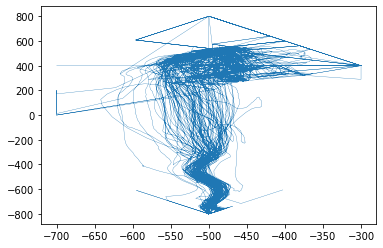

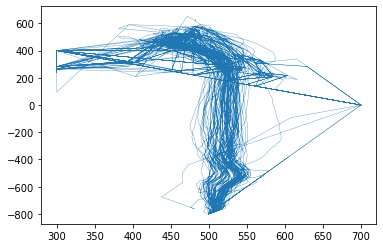

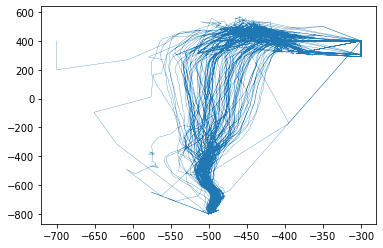

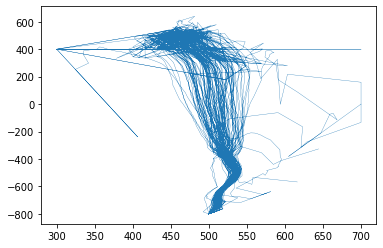

In [ ]:
plt.plot(co_L_x, co_L_y, linewidth=0.3)
plt.show()

plt.plot(co_R_x, co_R_y, linewidth=0.3)
plt.show()

plt.plot(pt_L_x, pt_L_y, linewidth=0.3)
plt.show()

plt.plot(pt_R_x, pt_R_y, linewidth=0.3)
plt.show()

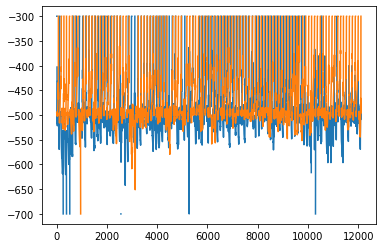

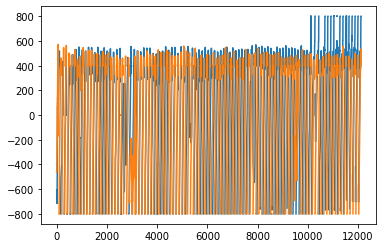

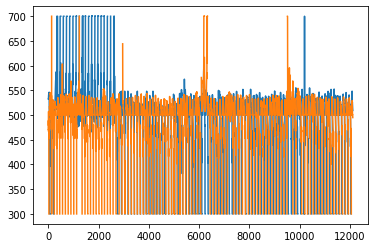

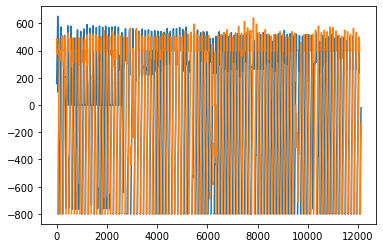

In [ ]:
plt.plot(co_L_x)
plt.plot(pt_L_x)
plt.show()

plt.plot(co_L_y)
plt.plot(pt_L_y)
plt.show()

plt.plot(co_R_x)
plt.plot(pt_R_x)
plt.show()

plt.plot(co_R_y)
plt.plot(pt_R_y)
plt.show()

In [ ]:
col = ['Time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6',
       'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'L_tot', 'R_tot']

df_co = pd.read_csv(GPD_co_fl[5], sep='\t', names=col)
df_pt = pd.read_csv(GPD_pt_fl[5], sep='\t', names=col)

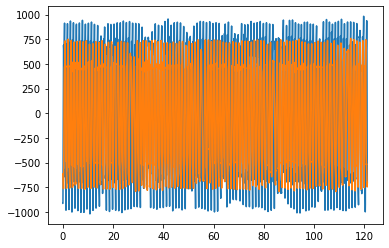

In [ ]:
plt.plot(df_co['Time'], df_co['L_tot'] - df_co['R_tot'])
plt.plot(df_pt['Time'], df_pt['L_tot'] - df_pt['R_tot'])
plt.show()

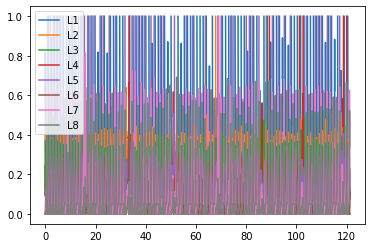

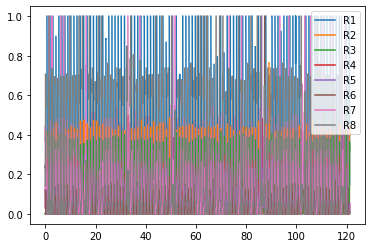

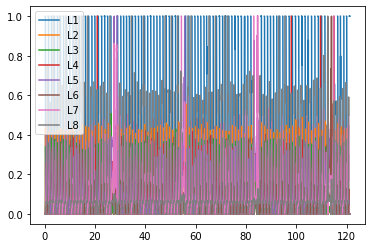

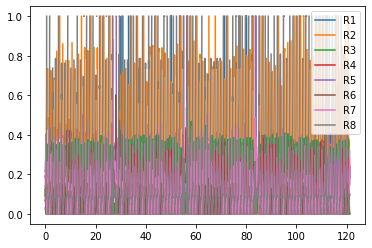

In [ ]:
for i in df_co.columns[1:9]:
    plt.plot(df_co['Time'], df_co[i] / df_co['L_tot'], label=i)
plt.legend()
plt.show()

for i in df_co.columns[9:-2]:
    plt.plot(df_co['Time'], df_co[i] / df_co['R_tot'], label=i)
plt.legend()
plt.show()

for i in df_pt.columns[1:9]:
    plt.plot(df_pt['Time'], df_pt[i] / df_pt['L_tot'], label=i)
plt.legend()
plt.show()

for i in df_pt.columns[9:-2]:
    plt.plot(df_pt['Time'], df_pt[i] / df_pt['R_tot'], label=i)
plt.legend()
plt.show()

In [ ]:
co_L_x = (np.array(df_co.iloc[:, 1:9]) @ L_x.T) / df_co['L_tot']
pt_L_x = (np.array(df_pt.iloc[:, 1:9]) @ L_x.T) / df_pt['L_tot']
co_R_x = (np.array(df_co.iloc[:, 9:-2]) @ R_x.T) / df_co['R_tot']
pt_R_x = (np.array(df_pt.iloc[:, 9:-2]) @ R_x.T) / df_pt['R_tot']

co_L_y = (np.array(df_co.iloc[:, 1:9]) @ L_y.T) / df_co['L_tot']
pt_L_y = (np.array(df_pt.iloc[:, 1:9]) @ L_y.T) / df_pt['L_tot']
co_R_y = (np.array(df_co.iloc[:, 9:-2]) @ R_y.T) / df_co['R_tot']
pt_R_y = (np.array(df_pt.iloc[:, 9:-2]) @ R_y.T) / df_pt['R_tot']

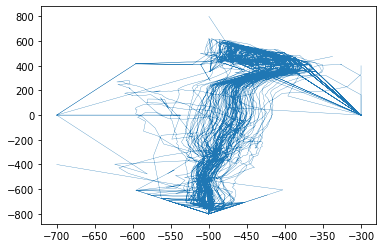

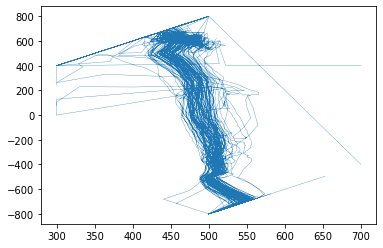

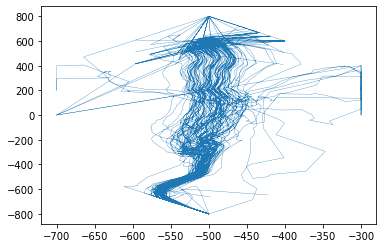

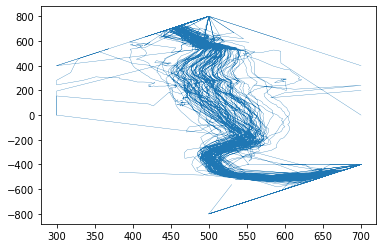

In [ ]:
plt.plot(co_L_x, co_L_y, linewidth=0.3)
plt.show()

plt.plot(co_R_x, co_R_y, linewidth=0.3)
plt.show()

plt.plot(pt_L_x, pt_L_y, linewidth=0.3)
plt.show()

plt.plot(pt_R_x, pt_R_y, linewidth=0.3)
plt.show()

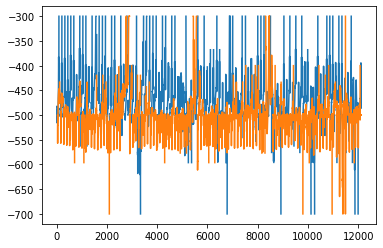

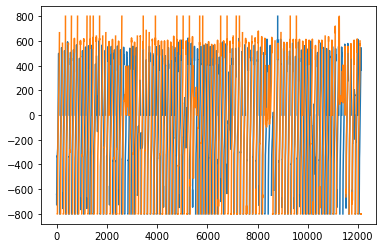

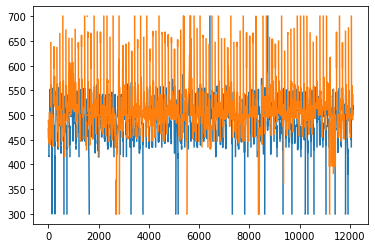

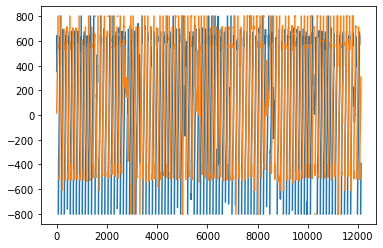

In [ ]:
plt.plot(co_L_x)
plt.plot(pt_L_x)
plt.show()

plt.plot(co_L_y)
plt.plot(pt_L_y)
plt.show()

plt.plot(co_R_x)
plt.plot(pt_R_x)
plt.show()

plt.plot(co_R_y)
plt.plot(pt_R_y)
plt.show()

In [ ]:
col = ['Time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6',
       'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'L_tot', 'R_tot']

for i in range(5):
    globals()[f'df_co_{i}'] = pd.read_csv(GPD_co_fl[i], sep='\t', names=col)
    globals()[f'df_pt_{i}'] = pd.read_csv(GPD_pt_fl[i], sep='\t', names=col)

In [ ]:
def center_plot(dfco, dfpt, Lx=L_x, Ly=L_y, Rx=R_x, Ry=R_y):
    co_L_x = (np.array(df_co.iloc[:, 1:9]) @ L_x.T) / df_co['L_tot']
    pt_L_x = (np.array(df_pt.iloc[:, 1:9]) @ L_x.T) / df_pt['L_tot']
    co_R_x = (np.array(df_co.iloc[:, 9:-2]) @ R_x.T) / df_co['R_tot']
    pt_R_x = (np.array(df_pt.iloc[:, 9:-2]) @ R_x.T) / df_pt['R_tot']

    co_L_y = (np.array(df_co.iloc[:, 1:9]) @ L_y.T) / df_co['L_tot']
    pt_L_y = (np.array(df_pt.iloc[:, 1:9]) @ L_y.T) / df_pt['L_tot']
    co_R_y = (np.array(df_co.iloc[:, 9:-2]) @ R_y.T) / df_co['R_tot']
    pt_R_y = (np.array(df_pt.iloc[:, 9:-2]) @ R_y.T) / df_pt['R_tot']

    fig, axs = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
    # plt.xlim(-800,800);
    axs[0,0].plot(co_L_x, co_L_y, ms=0.5, linewidth=0.1)
    axs[0,1].plot(co_R_x, co_R_y, ms=0.5, linewidth=0.1)
    axs[1,0].plot(pt_L_x, pt_L_y, ms=0.5, linewidth=0.1)
    axs[1,1].plot(pt_R_x, pt_R_y, ms=0.5, linewidth=0.1)
    for i in range(2):
        for j in range(2):
            axs[i,j].set_aspect('equal');
    plt.tight_layout()

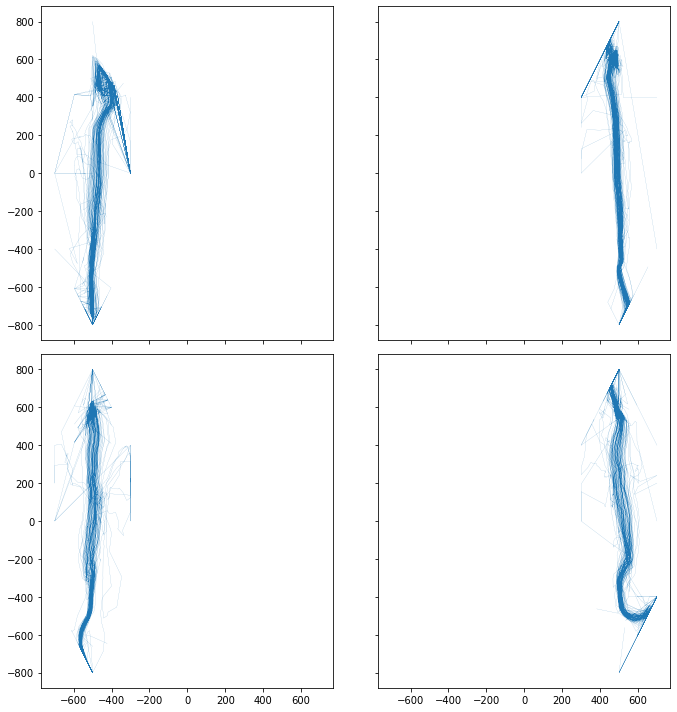

In [ ]:
center_plot(df_co_0, df_pt_0)

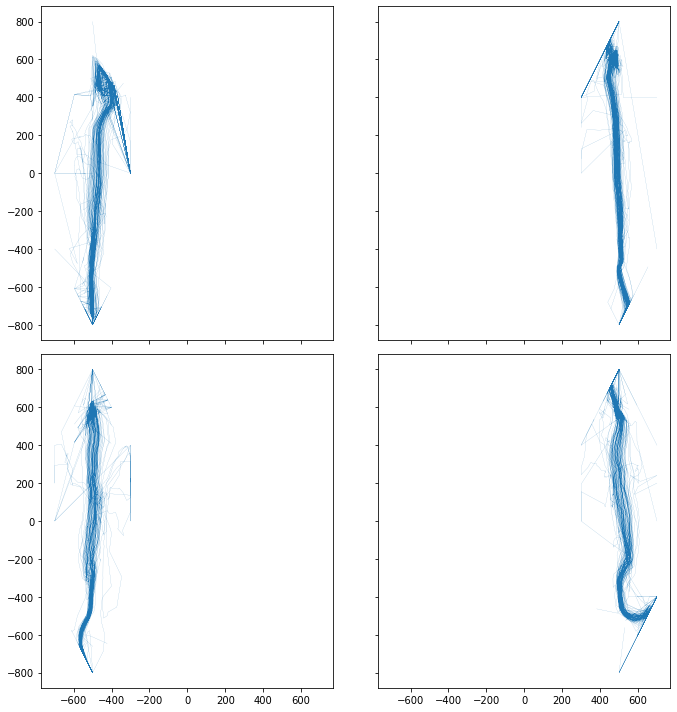

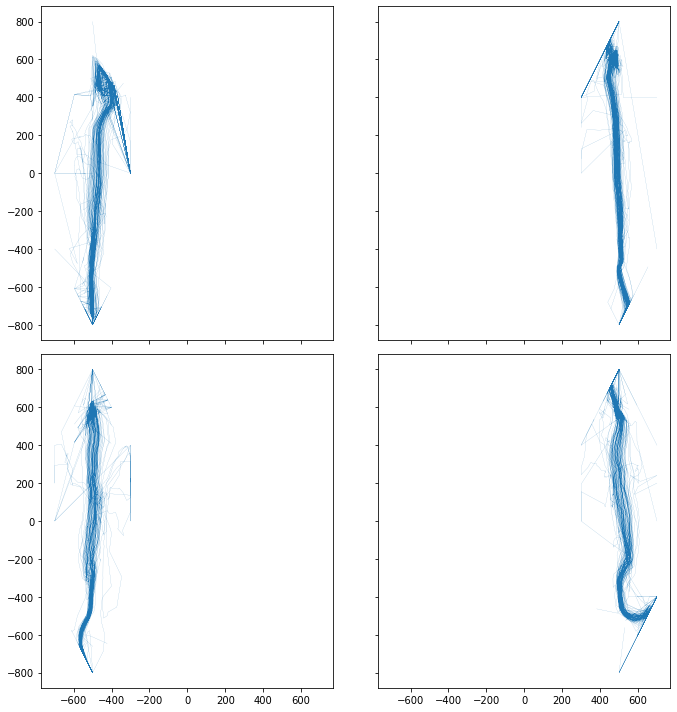

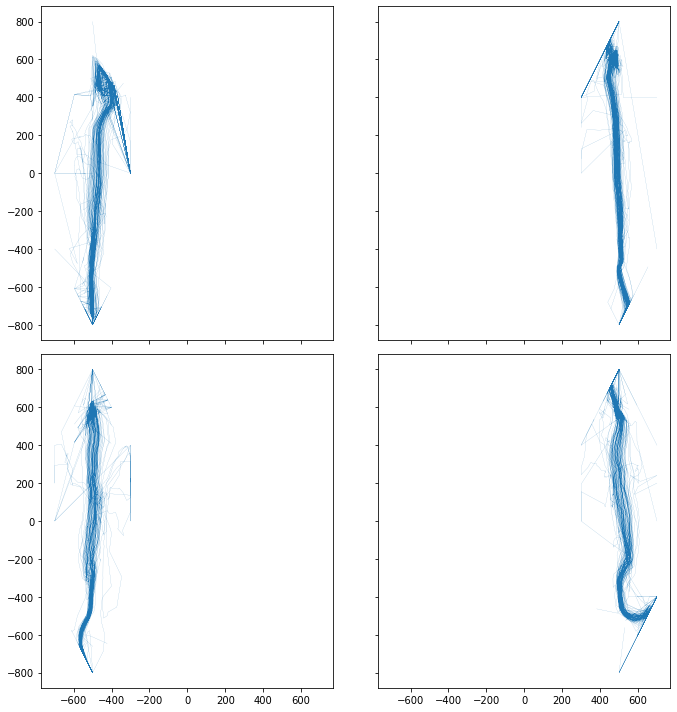

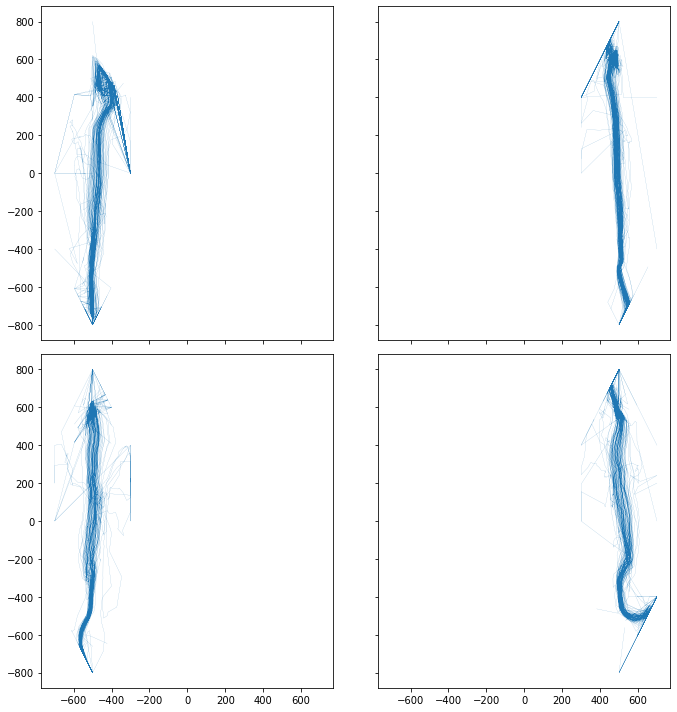

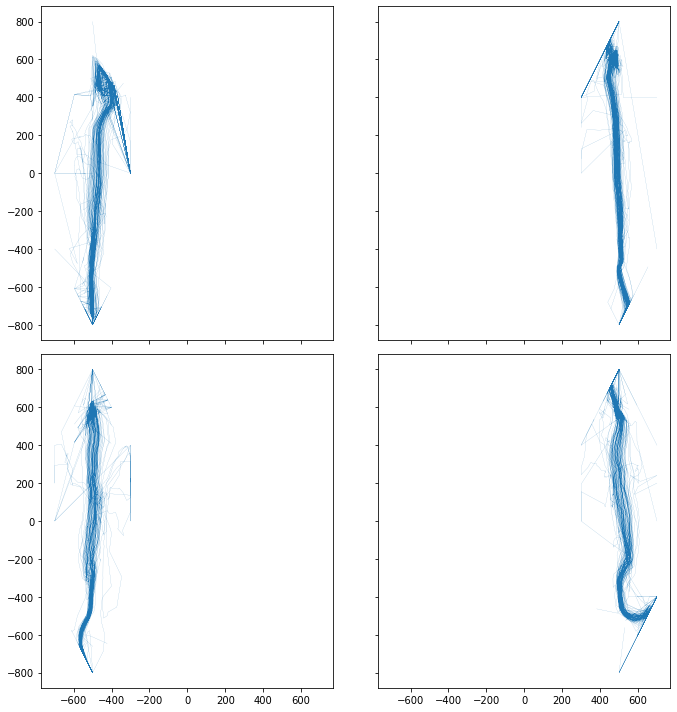

In [ ]:
for i in range(5):
    center_plot(globals()[f'df_co_{i}'], globals()[f'df_pt_{i}'])